In [1]:
# Dependencies and Setup
%matplotlib inline
%config InlineBackend.figure_format='svg'
from IPython.display import display,HTML
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from prettypandas import PrettyPandas
sns.set_style("ticks")
sns.set_context(context="notebook",font_scale=1)

#Google API
import requests
import gmaps
from config import gkey

In [2]:
# Read OKCupid Data file
df = pd.read_csv("profiles.csv")
print("The dataset contains {} records".format(len(df)))

# Show dataframe and print dataframe info
males = df[df["sex"]=="m"] # male users
females = df[df["sex"]=="f"] # female users
print("{} males ({:.1%}), {} females ({:.1%})".format(
    len(males),len(males)/len(df),
    len(females),len(females)/len(df)))

df = df.drop(['essay0', 'essay1', 'essay2', 
         'essay3', 'essay4', 'essay4', 
         'essay5', 'essay6', 'essay7', 
         'essay8', 'essay9'], axis=1)
df['UID'] = df.index
df.head()

The dataset contains 59946 records
35829 males (59.8%), 24117 females (40.2%)


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,UID
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,0
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,2
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,4


In [3]:
# Changed all -1 values in income to 0
df = df.replace({-1: None})
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,UID
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,None,transportation,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,0
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,None,NaN,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,2
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,None,artistic / musical / writer,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,4


In [4]:
# Create dataframe that gets rid of rows where income is not reported
income = df[df.income.notna()]
income.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,UID
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3
11,28,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000,banking / financial / real estate,...,NaN,straight,likes cats,christianity and very serious about it,m,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)",seeing someone,11
13,30,skinny,mostly anything,socially,never,graduated from high school,white,66.0,30000,sales / marketing / biz dev,...,NaN,straight,has dogs and likes cats,christianity but not too serious about it,f,NaN,no,english,single,13
14,29,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62.0,50000,other,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,f,taurus,no,english,single,14


In [5]:
jobs_df = df
jobs_df['job'].unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [6]:
# Clean up job column
jobs_df = jobs_df.replace({'nan': None, 'rather not say': None,'other': None})
jobs_df = jobs_df[jobs_df.job.notna()]
jobs_df['job'].unique()

array(['transportation', 'hospitality / travel', 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'political / government',
       'law / legal services', 'unemployed', 'military', 'retired'],
      dtype=object)

In [7]:
# Create a limited job dataframe to reduce job groups with less than 1000 respondents
jobs_count = jobs_df
jobs_count = jobs_count.groupby(['job']).aggregate({'UID': 'count'})
jobs_lite = jobs_df.replace({'nan': None, 
                             'rather not say': None,
                             'other': None, 
                             'clerical / administrative': None,
                             'military': None,
                             'political / government': None,
                             'retired': None,
                             'transportation':None, 
                             'unemployed': None,
                            })
jobs_lite = jobs_lite[jobs_lite.job.notna()]
jobs_lite['job'].unique()

array(['hospitality / travel', 'student', 'artistic / musical / writer',
       'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'construction / craftsmanship',
       'law / legal services'], dtype=object)

# Religion vs. Job Analysis

In [8]:
# Create database for religion analysis
religion_df = df
religion_df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [9]:
# Clean up religion column
rel_vals_to_replace = {'agnosticism and very serious about it': 'agnosticism', 
                   'agnosticism but not too serious about it': 'agnosticism',
                   'agnosticism and somewhat serious about it': 'agnosticism',
                   'agnosticism and laughing about it': 'agnosticism',
                   'atheism and laughing about it': 'atheism',
                   'atheism and somewhat serious about it': 'atheism',
                   'atheism but not too serious about it': 'atheism',
                   'atheism and very serious about it': 'atheism',
                   'buddhism but not too serious about it': 'buddhism',
                   'buddhism and somewhat serious about it': 'buddhism',
                   'buddhism and very serious about it': 'buddhism',
                   'buddhism and laughing about it': 'buddhism',
                   'christianity and very serious about it': 'christianity',
                   'christianity but not too serious about it': 'christianity',
                   'christianity and somewhat serious about it': 'christianity',
                   'christianity and laughing about it': 'christianity',
                   'catholicism but not too serious about it': 'catholicism',
                   'catholicism and somewhat serious about it': 'catholicism',
                   'catholicism and very serious about it': 'catholicism',
                   'catholicism and laughing about it': 'catholicism',
                   'other and somewhat serious about it': 'other',
                   'other and very serious about it': 'other',
                   'other but not too serious about it': 'other',
                   'other and laughing about it': 'other',
                   'judaism and laughing about it': 'judaism',
                   'judaism and very serious about it': 'judaism',
                   'judaism and somewhat serious about it': 'judaism',
                   'judaism but not too serious about it': 'judaism',
                   'hinduism and somewhat serious about it': 'hinduism',
                   'hinduism and very serious about it': 'hinduism',
                   'hinduism but not too serious about it': 'hinduism',
                   'hinduism and laughing about it': 'hinduism',
                   'islam but not too serious about it': 'islam',
                   'islam and laughing about it': 'islam',
                   'islam and somewhat serious about it': 'islam',
                   'islam and very serious about it': 'islam',
                  }
religion_df['religion'] = religion_df['religion'].map(rel_vals_to_replace)
religion_df.religion.unique()

array(['agnosticism', nan, 'christianity', 'atheism', 'catholicism',
       'buddhism', 'other', 'judaism', 'hinduism', 'islam'], dtype=object)

In [10]:
# Drop all rows that have none for religion and job types that have less than 1000 IDs
religion_df = religion_df.replace({'nan': None, 
                             'rather not say': None,
                             'other': None, 
                             'clerical / administrative': None,
                             'military': None,
                             'political / government': None,
                             'retired': None,
                             'transportation':None, 
                             'unemployed': None,
                             'construction / craftsmanship': None,
                             'banking / financial / real estate': None,
                             'entertainment / media': None,
                             'hospitality / travel': None,
                             'entertainment / media': None,
                             'law / legal services': None,    
                            })
religion_df = religion_df.replace({'NaN': None})
religion_df = religion_df[religion_df.religion.notna()]
religion_df = religion_df[religion_df.job.notna()]
religion_df['job'].unique()

array(['student', 'sales / marketing / biz dev', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'artistic / musical / writer',
       'computer / hardware / software'], dtype=object)

In [11]:
# Create dataframe comparing religion to jobs
rel_v_job = religion_df.groupby(['religion', 'job'])['UID'].count().unstack(level=1)
rel_v_job.head()

job,artistic / musical / writer,computer / hardware / software,education / academia,executive / management,medicine / health,sales / marketing / biz dev,science / tech / engineering,student
religion,,,,,,,,
agnosticism,513,726,341,248,298,416,632,587
atheism,409,764,236,143,157,227,642,522
buddhism,180,119,136,68,148,77,116,125
catholicism,166,219,260,158,285,391,224,322
christianity,182,217,218,200,262,397,255,418


In [12]:
per_rel_v_job = rel_v_job
for column in per_rel_v_job.columns:
    per_rel_v_job[column] = (per_rel_v_job[column]/per_rel_v_job[column].sum())*100
rel_v_job = per_rel_v_job

In [13]:
amw_x = rel_v_job['artistic / musical / writer']
chs_x = rel_v_job['computer / hardware / software']
ea_x = rel_v_job['education / academia']
em_x = rel_v_job['executive / management']
mh_x = rel_v_job['medicine / health']
smb_x = rel_v_job['sales / marketing / biz dev']
ste_x = rel_v_job['science / tech / engineering']
stu_x = rel_v_job['student']

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


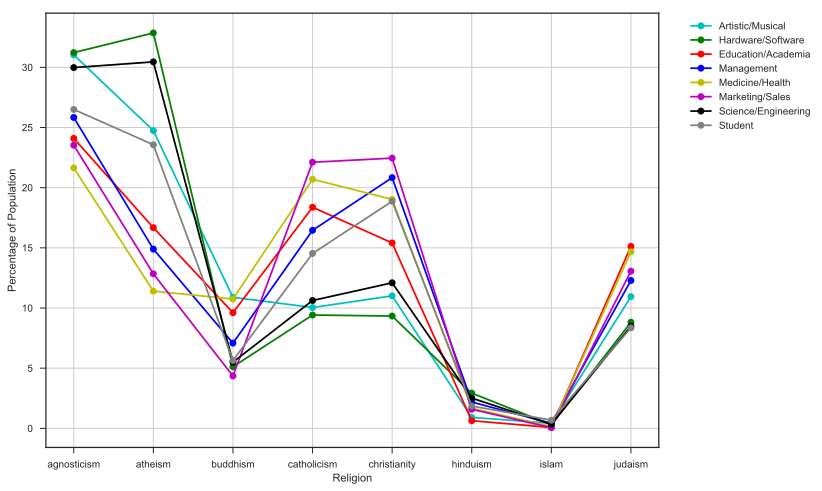

In [14]:
builds = np.array(rel_v_job.index)
y_stack = np.row_stack(([amw_x, chs_x, ea_x, em_x, mh_x, smb_x, ste_x, stu_x]))

# Create line graph for comparison
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(builds, y_stack[0,:], label='Artistic/Musical', color='c', marker='o')
ax1.plot(builds, y_stack[1,:], label='Hardware/Software', color='g', marker='o')
ax1.plot(builds, y_stack[2,:], label='Education/Academia', color='r', marker='o')
ax1.plot(builds, y_stack[3,:], label='Management', color='b', marker='o')
ax1.plot(builds, y_stack[4,:], label='Medicine/Health', color='y', marker='o')
ax1.plot(builds, y_stack[5,:], label='Marketing/Sales', color='m', marker='o')
ax1.plot(builds, y_stack[6,:], label='Science/Engineering', color='k', marker='o')
ax1.plot(builds, y_stack[7,:], label='Student', color='0.5', marker='o')

plt.xticks(builds)
plt.xlabel('Religion')
plt.ylabel('Percentage of Population')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig("Jobs_vs_Religion.png", dpi=150,  bbox_inches="tight")
plt.show()

# Astrological Sign vs. Job

In [15]:
sign_df = df
sign_df['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [16]:
# Clean up astrology ('sign') column
sign_vals_to_replace = {'pisces but it doesn&rsquo;t matter':'pisces',
                       'gemini but it doesn&rsquo;t matter': 'gemini',
                       'cancer but it doesn&rsquo;t matter': 'cancer',
                       'leo but it doesn&rsquo;t matter': 'leo',
                       'aquarius but it doesn&rsquo;t matter': 'aquarius',
                       'aries and it&rsquo;s fun to think about': 'aries',
                       'libra but it doesn&rsquo;t matter': 'libra',
                       'pisces and it&rsquo;s fun to think about': 'pisces',
                       'taurus but it doesn&rsquo;t matter': 'taurus',
                       'sagittarius but it doesn&rsquo;t matter': 'sagittarius',
                       'scorpio and it matters a lot': 'scorpio',
                       'gemini and it&rsquo;s fun to think about': 'gemini',
                       'leo and it&rsquo;s fun to think about': 'leo',
                       'cancer and it&rsquo;s fun to think about': 'cancer',
                       'libra and it&rsquo;s fun to think about': 'libra',
                       'aquarius and it&rsquo;s fun to think about': 'aquarius',
                       'virgo but it doesn&rsquo;t matter': 'virgo',
                       'scorpio and it&rsquo;s fun to think about': 'scorpio',
                       'capricorn but it doesn&rsquo;t matter': 'capricorn',
                       'capricorn and it&rsquo;s fun to think about': 'capricorn',
                       'aries but it doesn&rsquo;t matter': 'aries',
                       'scorpio but it doesn&rsquo;t matter': 'scorpio',
                       'sagittarius and it&rsquo;s fun to think about': 'sagittarius',
                       'libra and it matters a lot': 'libra',
                       'taurus and it&rsquo;s fun to think about': 'taurus',
                       'leo and it matters a lot': 'leo',
                       'virgo and it&rsquo;s fun to think about': 'virgo',
                       'cancer and it matters a lot': 'cancer',
                       'pisces and it matters a lot': 'pisces',
                       'aries and it matters a lot': 'aries',
                       'capricorn and it matters a lot': 'capricorn',
                       'aquarius and it matters a lot': 'aquarius',
                       'sagittarius and it matters a lot': 'sagittarius',
                       'gemini and it matters a lot': 'gemini',
                       'taurus and it matters a lot': 'taurus',
                       'virgo and it matters a lot': 'virgo'
                  }
sign_df['sign'] = sign_df['sign'].map(sign_vals_to_replace)
sign_df.sign.unique()

array([nan, 'pisces', 'gemini', 'cancer', 'leo', 'aquarius', 'aries',
       'libra', 'taurus', 'sagittarius', 'scorpio', 'virgo', 'capricorn'],
      dtype=object)

In [17]:
# Drop all rows that have none for astrology and job types that have less than 1000 IDs
sign_df = sign_df.replace({'nan': None, 
                             'rather not say': None,
                             'other': None, 
                             'clerical / administrative': None,
                             'military': None,
                             'political / government': None,
                             'retired': None,
                             'transportation':None, 
                             'unemployed': None,
                             'construction / craftsmanship': None,
                             'banking / financial / real estate': None,
                             'entertainment / media': None,
                             'hospitality / travel': None,
                             'entertainment / media': None,
                             'law / legal services': None,    
                            })
sign_df = sign_df[sign_df.sign.notna()]
sign_df = sign_df[sign_df.job.notna()]

In [18]:
# Create dataframe comparing astrology sign to jobs
astro_v_job = sign_df.groupby(['sign', 'job'])['UID'].count().unstack(level=1)
astro_v_job

job,artistic / musical / writer,computer / hardware / software,education / academia,executive / management,medicine / health,sales / marketing / biz dev,science / tech / engineering,student
sign,,,,,,,,
aquarius,228,266,183,121,189,237,274,263
aries,249,237,207,119,181,237,240,266
cancer,262,265,222,136,206,213,236,263
capricorn,228,212,169,119,178,216,191,290
gemini,292,296,214,118,225,260,233,308
leo,261,273,174,132,211,238,260,293
libra,259,260,187,134,176,262,250,279
pisces,231,270,206,120,184,237,233,254
sagittarius,251,251,181,112,196,230,230,275


In [19]:
per_astro_v_job = astro_v_job
for column in per_astro_v_job.columns:
    per_astro_v_job[column] = (per_astro_v_job[column]/per_astro_v_job[column].sum())*100

In [20]:
amw_xs = astro_v_job['artistic / musical / writer']
chs_xs = astro_v_job['computer / hardware / software']
ea_xs = astro_v_job['education / academia']
em_xs = astro_v_job['executive / management']
mh_xs = astro_v_job['medicine / health']
smb_xs = astro_v_job['sales / marketing / biz dev']
ste_xs = astro_v_job['science / tech / engineering']
stu_xs = astro_v_job['student']

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


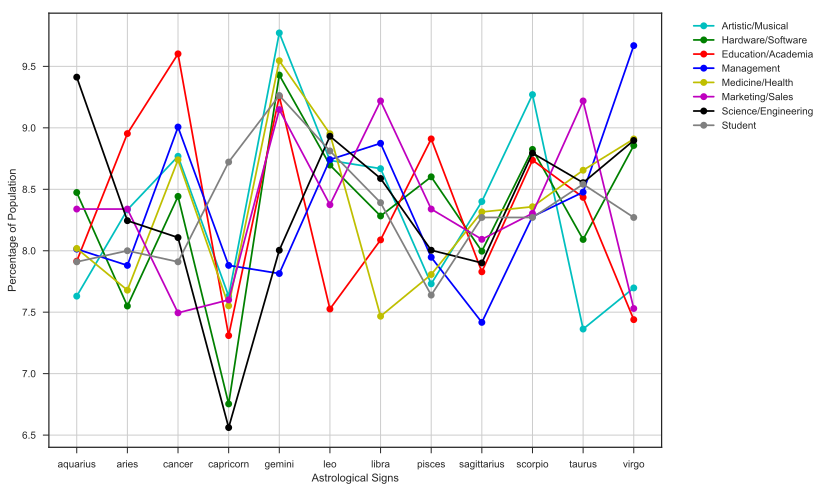

In [21]:
builds_signs = np.array(astro_v_job.index)
signs_y_stack = np.row_stack(([amw_xs, chs_xs, ea_xs, em_xs, mh_xs, smb_xs, ste_xs, stu_xs]))

# Create line graph for comparison
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(builds_signs, signs_y_stack[0,:], label='Artistic/Musical', color='c', marker='o')
ax1.plot(builds_signs, signs_y_stack[1,:], label='Hardware/Software', color='g', marker='o')
ax1.plot(builds_signs, signs_y_stack[2,:], label='Education/Academia', color='r', marker='o')
ax1.plot(builds_signs, signs_y_stack[3,:], label='Management', color='b', marker='o')
ax1.plot(builds_signs, signs_y_stack[4,:], label='Medicine/Health', color='y', marker='o')
ax1.plot(builds_signs, signs_y_stack[5,:], label='Marketing/Sales', color='m', marker='o')
ax1.plot(builds_signs, signs_y_stack[6,:], label='Science/Engineering', color='k', marker='o')
ax1.plot(builds_signs, signs_y_stack[7,:], label='Student', color='0.5', marker='o')

plt.xticks(builds_signs)
plt.xlabel('Astrological Signs')
plt.ylabel('Percentage of Population')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig("Jobs_vs_AstrologicalSign.png", dpi=150,  bbox_inches="tight")
plt.show()

# Offspring & Job

In [22]:
offs_df = df
offs_df['offspring'].unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [23]:
# Clean up offspring column
offs_vals_to_replace = {'doesn&rsquo;t have kids, but might want them': 'Maybe',
                        'doesn&rsquo;t want kids': 'No',
                        'doesn&rsquo;t have kids, but wants them': "Yes",
                        'doesn&rsquo;t have kids': 'Neutral', 
                        'wants kids': "Yes", 
                        'has a kid': "1 Child",
                        'has kids': "Multiple Children",
                        'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 'No',
                        'has kids, but doesn&rsquo;t want more': "Multiple Children",
                        'has a kid, but doesn&rsquo;t want more': "1 Child",
                        'has a kid, and wants more': '1 Child', 
                        'has kids, and might want more': 'Multiple Children',
                        'might want kids': 'Maybe', 
                        'has a kid, and might want more': '1 Child',
                        'has kids, and wants more': 'Multiple Children',
                          }
offs_df['offspring'] = offs_df['offspring'].map(offs_vals_to_replace)
offs_df.offspring.unique()

array(['Maybe', nan, 'No', 'Yes', 'Neutral', '1 Child',
       'Multiple Children'], dtype=object)

In [22]:
# Drop all rows that have none for offspring
offs_df = offs_df.replace({'NaN': None, 
                           'other': None, 
                             'clerical / administrative': None,
                             'military': None,
                             'political / government': None,
                             'retired': None,
                             'transportation':None, 
                             'unemployed': None,
                             'construction / craftsmanship': None,
                             'banking / financial / real estate': None,
                             'entertainment / media': None,
                             'hospitality / travel': None,
                             'entertainment / media': None,
                             'law / legal services': None,    
                            })
offs_df = offs_df[offs_df.job.notna()]
offs_df = offs_df[offs_df.offspring.notna()]
offs_df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,UID
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,...,No,straight,likes cats,NaN,m,NaN,no,"english, german (poorly)",single,3
5,29,average,mostly anything,socially,NaN,graduated from college/university,white,67.0,NaN,computer / hardware / software,...,Maybe,straight,likes cats,NaN,m,NaN,no,"english (fluently), chinese (okay)",single,5
7,31,average,mostly anything,socially,never,graduated from college/university,white,65.0,NaN,artistic / musical / writer,...,Yes,straight,likes dogs and likes cats,NaN,f,NaN,no,"english, spanish (okay)",single,7
15,39,fit,strictly anything,socially,NaN,graduated from college/university,white,65.0,NaN,medicine / health,...,Neutral,straight,likes dogs and has cats,atheism,f,aquarius,no,"english (fluently), spanish (okay)",single,15
19,33,athletic,mostly anything,socially,never,graduated from masters program,white,72.0,NaN,science / tech / engineering,...,Neutral,straight,likes dogs and likes cats,catholicism,m,pisces,no,english (fluently),single,19


In [23]:
# Create dataframe comparing offspring to jobs
offs_v_job = offs_df.groupby(['offspring', 'job'])['UID'].count().unstack(level=1)
offs_v_job

job,artistic / musical / writer,computer / hardware / software,education / academia,executive / management,medicine / health,rather not say,sales / marketing / biz dev,science / tech / engineering,student
offspring,,,,,,,,,
1 Child,176,158,183,150,251,37,154,126,67
Maybe,317,366,229,173,251,33,309,373,362
Multiple Children,175,130,206,209,258,32,169,129,35
Neutral,519,661,429,291,434,45,635,707,670
No,465,395,186,158,205,45,221,290,366
Yes,175,223,290,192,336,17,397,312,317


In [ ]:
per_offs_v_job = offs_v_job
for column in per_offs_v_job.columns:
    per_offs_v_job[column] = (per_offs_v_job[column]/per_offs_v_job[column].sum())*100
offs_v_job = per_offs_v_job

In [24]:
amw_xo = offs_v_job['artistic / musical / writer']
chs_xo = offs_v_job['computer / hardware / software']
ea_xo = offs_v_job['education / academia']
em_xo = offs_v_job['executive / management']
mh_xo = offs_v_job['medicine / health']
smb_xo = offs_v_job['sales / marketing / biz dev']
ste_xo = offs_v_job['science / tech / engineering']
stu_xo = offs_v_job['student']

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


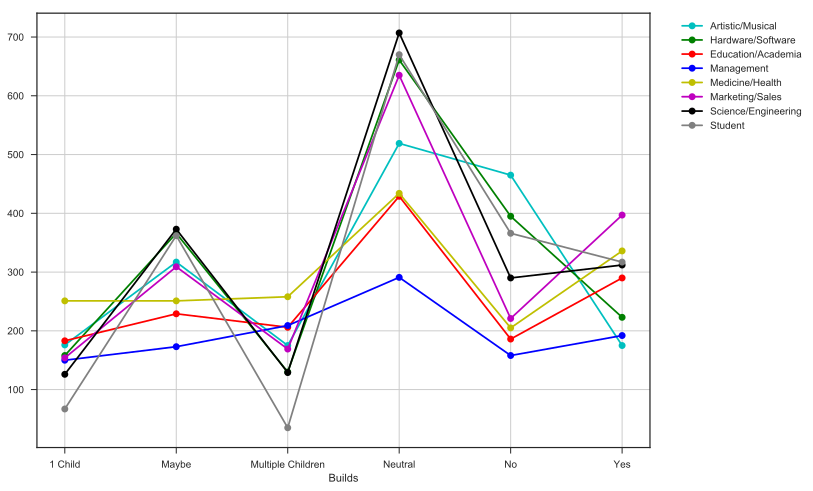

In [25]:
builds_offs = np.array(offs_v_job.index)
offs_y_stack = np.row_stack(([amw_xo, chs_xo, ea_xo, em_xo, mh_xo, smb_xo, ste_xo, stu_xo]))

# Create line graph for comparison
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(builds_offs, offs_y_stack[0,:], label='Artistic/Musical', color='c', marker='o')
ax1.plot(builds_offs, offs_y_stack[1,:], label='Hardware/Software', color='g', marker='o')
ax1.plot(builds_offs, offs_y_stack[2,:], label='Education/Academia', color='r', marker='o')
ax1.plot(builds_offs, offs_y_stack[3,:], label='Management', color='b', marker='o')
ax1.plot(builds_offs, offs_y_stack[4,:], label='Medicine/Health', color='y', marker='o')
ax1.plot(builds_offs, offs_y_stack[5,:], label='Marketing/Sales', color='m', marker='o')
ax1.plot(builds_offs, offs_y_stack[6,:], label='Science/Engineering', color='k', marker='o')
ax1.plot(builds_offs, offs_y_stack[7,:], label='Student', color='0.5', marker='o')

plt.xticks(builds_offs)
plt.xlabel('Interest in Offspring')
plt.ylabel('Percentage of Population')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig("Jobs_vs_Offspring.png", dpi=150,  bbox_inches="tight")
plt.show()

# Sexual Orientation & Job

In [26]:
# Create a orientation dataframe 
orientation_df = df
orientation_df['orientation'].unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

In [27]:
# Clean up orientation column
orientation_vals_to_replace = {'gay': 'gay or bisexual',
                                'bisexual': 'gay or bisexual',
                               'straight': 'straight',
                          }
orientation_df['orientation'] = orientation_df['orientation'].map(orientation_vals_to_replace)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


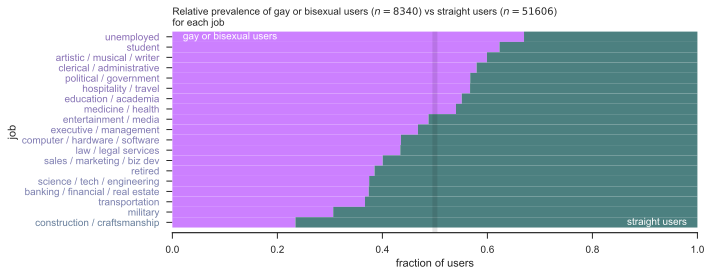

In [28]:
# Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="medium",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="medium",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,4))
compare_prevalence(
    series=jobs_df["job"],                          # Which categorical attribute?
    g1=orientation_df["orientation"]=="gay or bisexual",      g2=orientation_df["orientation"]=="straight",        # Definition of the two groups
    g1name="gay or bisexual users",   g2name="straight users",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()
plt.savefig("Jobs_vs_Orientation.png", dpi=150)

In [29]:
# Create a drugs dataframe 
drugs_df = df
drugs_df['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [30]:
# Clean up drugs column
drugs_vals_to_replace = {'sometimes': 'Yes',
                        'often': 'Yes',
                        'never': 'No',
                          }
drugs_df['drugs'] = drugs_df['drugs'].map(drugs_vals_to_replace)

In [31]:
# Drop rows that have nan
drugs_df = drugs_df.replace({'nan': None})
drugs_df = drugs_df[drugs_df.drugs.notna()]

In [32]:
len(drugs_df.loc[drugs_df['drugs']=="No"])

37724

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


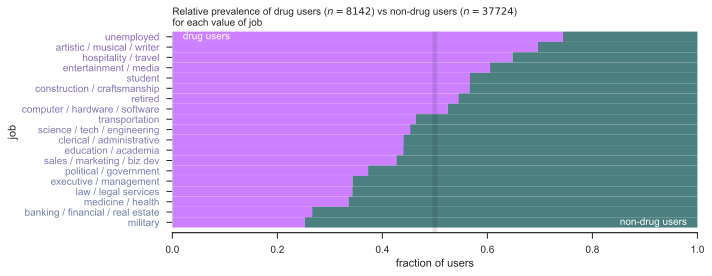

In [33]:
# Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each value of {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="medium",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="medium",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,4))
compare_prevalence(
    series=jobs_df["job"],                          # Which categorical attribute?
    g1=df["drugs"]=="Yes",      g2=df["drugs"]=="No",        # Definition of the two groups
    g1name="drug users",   g2name="non-drug users",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()
plt.savefig("Jobs_vs_Drugs.png", dpi=150)

In [34]:
# Create a drinks dataframe 
drinks_df = df
drinks_df['drinks'].unique()

# Clean up drinks column
drinks_vals_to_replace = {'socially': 'Yes',
                        'often': 'Yes',
                        'rarely': 'Yes',
                        'very often': 'Yes',
                        'not at all': 'No',
                          }
drinks_df['drinks'] = drinks_df['drinks'].map(drinks_vals_to_replace)

In [35]:
# Drop rows that have nan
drinks_df = drinks_df.replace({'nan': None})
drinks_df = drinks_df[drinks_df.drinks.notna()]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


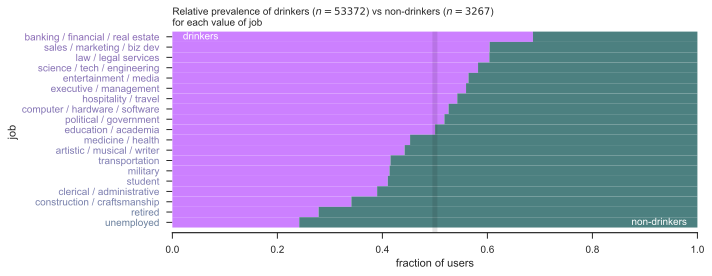

In [36]:
#Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each value of {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="medium",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="medium",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,4))
compare_prevalence(
    series=jobs_df["job"],                          # Which categorical attribute?
    g1=df["drinks"]=="Yes",      g2=df["drinks"]=="No",        # Definition of the two groups
    g1name="drinkers",   g2name="non-drinkers",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()
plt.savefig("Jobs_vs_Drinks.png", dpi=150)

In [37]:
# Merge and drop education data
education_df_income = income
education_df = education_df_income
education_df['New_ID'] = education_df.index
education_replaced = education_df.replace({'working on college/university':'High school graduate',
                            'working on space camp':None,
                            'graduated from masters program':'Master degree',
                            'graduated from college/university':'Bachelor degree',
                            'working on two-year college':'Some college, no degree',
                            'nan':None,
                            'graduated from high school':'High school graduate',
                            'working on masters program':'Bachelor degree',
                            'graduated from space camp':None,
                            'college/university':'Bachelor degree',
                            'dropped out of space camp':None,
                            'graduated from ph.d program':'Doctoral degree',
                            'graduated from law school':'Associate degree',
                            'working on ph.d program':'Bachelor degree',
                            'two-year college':'Some college, no degree',
                            'graduated from two-year college':'Some college, no degree',
                            'working on med school':'High school graduate',
                            'dropped out of college/university':'Some college, no degree',
                            'space camp':None,
                            'graduated from med school':'Associate degree',
                            'dropped out of high school':'No high school',
                            'working on high school':'No high school',
                            'masters program':'Master degree',
                            'dropped out of ph.d program':'Bachelor degree',
                            'dropped out of two-year college':'Some college, no degree',
                            'dropped out of med school':'High school graduate',
                            'high school':'High school graduate',
                            'working on law school':'High school graduate',
                            'law school':'Associate degree',
                            'dropped out of masters program':'Bachelor degree',
                            'ph.d program':'Doctoral degree',
                            'dropped out of law school':'High school graduate',
                            'med school':'Associate degree'
                            })
education_replaced = education_replaced[education_replaced.education.notna()]
education_replaced.groupby(['education']).aggregate({'New_ID': 'count'})
education_replaced.filter(like='No high school')  
education_replaced.head()
#education_replaced.to_csv('education_replaced.csv', sep=',')
education_replaced.groupby(['education']).aggregate({'New_ID': 'count'})


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,New_ID
education,
Associate degree,196
Bachelor degree,4846
Doctoral degree,224
High school graduate,2048
Master degree,1521
No high school,72
"Some college, no degree",1412


In [38]:
# Create a limited job dataframe to reduce job groups with less than 1000 respondents
jobs_df_income = income
jobs_df = jobs_df_income
jobs_df['New_ID'] = jobs_df.index
#jobs_df = jobs_df.groupby(['job']).aggregate({'New_ID': 'count'})
jobs_replaced = jobs_df.replace({'nan': None, 
                             'rather not say': None,
                             'other': None, 
                             'clerical / administrative': None,
                             'military': None,
                             'political / government': None,
                             'retired': None,
                             'transportation':None, 
                             'unemployed': None,
                            })
jobs_replaced = jobs_replaced[jobs_replaced.job.notna()]
jobs_replaced.groupby(['job']).aggregate({'New_ID': 'count'})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,New_ID
job,
artistic / musical / writer,1042
banking / financial / real estate,365
computer / hardware / software,1156
construction / craftsmanship,357
education / academia,738
entertainment / media,461
executive / management,557
hospitality / travel,345
law / legal services,217


                                 job         income
0        artistic / musical / writer  129155.470250
1  banking / financial / real estate  122712.328767
2     computer / hardware / software  108365.051903
3       construction / craftsmanship   91680.672269
4               education / academia   85365.853659


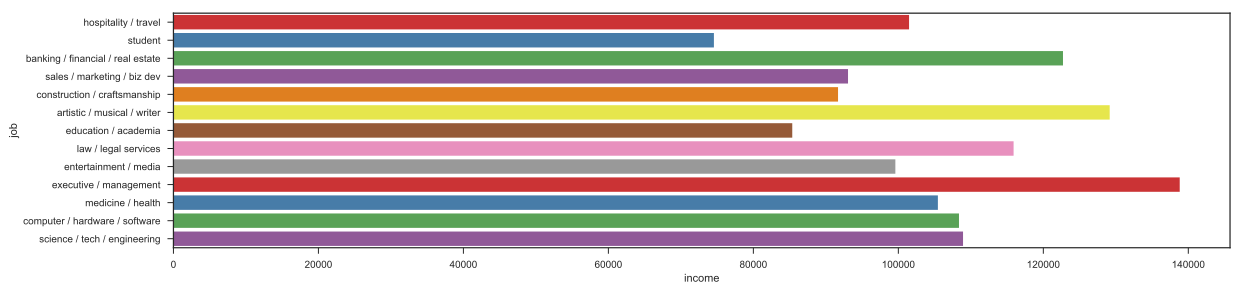

In [39]:
#get average income for different jobs
plt.figure(figsize=(19,7*0.6186))
temp_df = jobs_replaced.groupby(["job"]).agg({"income":"mean"}).reset_index()
print(temp_df.head())
ax_sns1 = sns.barplot(x = "income",
            y="job",
            data = jobs_replaced, 
            dodge = False,
            palette = "Set1",
           ci = None)
plt.show()

ax_sns1.figure.savefig("Job_vs_Income.png", dpi=150)

                             job        age
8           law / legal services  35.981567
9              medicine / health  35.477658
10   sales / marketing / biz dev  31.347126
11  science / tech / engineering  33.002049
12                       student  24.708669


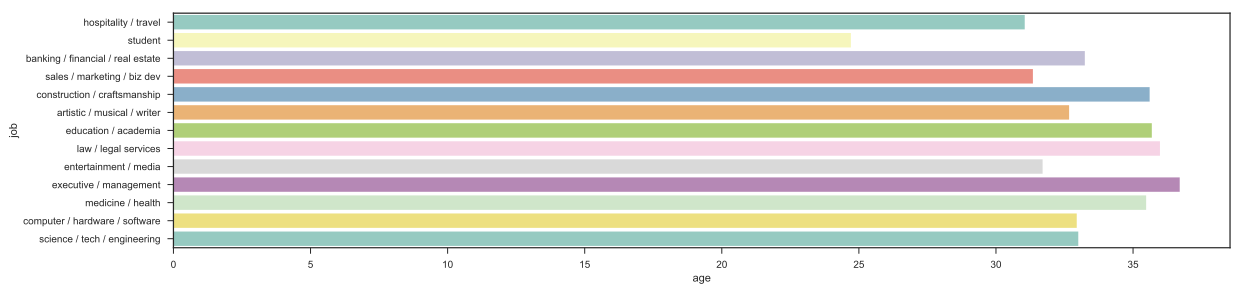

In [40]:
#get average age for different jobs
plt.figure(figsize=(19,7*0.6186))
temp_df = jobs_replaced.groupby(["job"]).agg({"age":"mean"}).reset_index()
print(temp_df.tail())
ax_sns2 = sns.barplot(x = "age", 
            y="job", 
            data = jobs_replaced,
            dodge = False, 
            palette = "Set3", 
           ci = None)
plt.show()
ax_sns2.figure.savefig("Job_vs_Age.png", dpi=150)

              education         income
0      Associate degree  149795.918367
1       Bachelor degree  106702.434998
2       Doctoral degree  147812.500000
3  High school graduate   77675.781250
4         Master degree  110000.000000


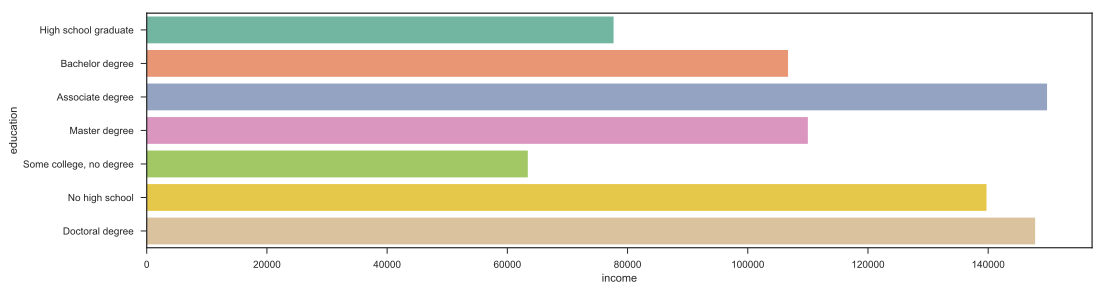

In [41]:
#get average income for different Education
plt.figure(figsize=(17,7*0.6186))
temp_df = education_replaced.groupby(["education"]).agg({"income":"mean"}).reset_index()
print(temp_df.head())
ax_sns3 = sns.barplot(x = "income", 
            y="education", 
            data = education_replaced, 
            dodge = False,
            palette = "Set2", 
           ci = None)
plt.show()
ax_sns3.figure.savefig("Income_vs_Education.png", dpi=150)

In [ ]:
df_location = df.loc[:,"location"].unique()
len(df_location)

# 1. What are the geocoordinates (latitude and longitude) of "location" in "profiles.csv"
# dataframe = d = profiles.csv
#Sex = m or f 


coord_df = pd.DataFrame(columns=["city","lng","lat"])

coord_df["city"] = df.loc[:,"location"].unique()
target_city = "San Francisco, California"
city = target_city


for index,row in coord_df.iterrows():
    #print(target_city)
    target_city = row["city"]
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
        'address={0}&key={1}').format(target_city, gkey)

    geo_data=requests.get(target_url).json()
  #  print(geo_data)

    #print(geo_data["results"][0]["geometry"]["location"])
    row["lat"] = geo_data["results"][0]["geometry"]["location"]["lat"]
    row["lng"] = geo_data["results"][0]["geometry"]["location"]["lng"]
    #print(geo_data["results"][0]["geometry"]["location"]["lat"])
    #print(geo_data["results"][0]["geometry"]["location"]["lng"])
    #merge lat & lng to coord_df




In [ ]:
coord_df.head(10)

In [ ]:
fig = gmaps.figure()

gmaps.configure(api_key=gkey)

locations = coord_df[['lat','lng']]

#Assign the marker layer to a variable
datapoints = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(datapoints)

fig

In [ ]:
gmaps.configure(api_key=gkey)

fig = gmaps.figure()

locations = coord_df[['lat','lng']].astype(float)

#city_rate = coord_df["city"]

city_layer = gmaps.heatmap_layer(locations, weights=None, max_intensity=None, dissipating=False, point_radius=None, opacity=0.6, gradient=None)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
city_layer.dissipating = False
city_layer.max_intensity = 100
city_layer.point_radius = 1

fig.add_layer(city_layer)

fig


In [ ]:
bank_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
)


fig = gmaps.figure()
fig.add_layer(bank_layer)

fig